<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/DTs/Exercise_3_dt_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 

1. Use the $\texttt{load_wine}$ data (remember to split your data into a train and test data). Go through the steps in the previous slides to find the most important features.

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

# Use the `load_wine` function to construct your dataset
X, y = load_wine(return_X_y = True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [7]:
# Initialize a DT
dt = tree.DecisionTreeClassifier()

# Fit your DT
dt.fit(X_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with default settings achieved {round(accuracy * 100, 1)}% accuracy.')

DT with default settings achieved 94.4% accuracy.


In [8]:
# Show top 10 featuers. No need to change the code, but you can change the 10 to show fewer (or more) featuees
import pandas as pd

importances = dt.feature_importances_
names = load_wine()['feature_names']

feature_importance = pd.DataFrame(zip(names, importances), columns = ['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending = False).reset_index()
feature_importance[:10]

,index,Feature,Importance
0,6,flavanoids,0.411053
1,9,color_intensity,0.384934
2,12,proline,0.164075
3,2,ash,0.020942
4,1,malic_acid,0.018995
5,0,alcohol,0.000000
6,3,alcalinity_of_ash,0.000000
7,4,magnesium,0.000000
8,5,total_phenols,0.000000
9,7,nonflavanoid_phenols,0.000000


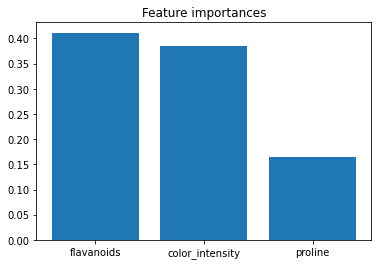

In [9]:
# Plot it - no need to change anything, but you can change the 3 to another number if you want to show more features.
from matplotlib import pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(feature_importance['Feature'][:3], feature_importance['Importance'][:3])
plt.show()

In [10]:
# Tree based on most important features only
top_features = (-importances).argsort()[:5]
print(top_features)

Z_train = X_train[:, top_features]
Z_test = X_test[:, top_features]

# Initialize a DT
dt = tree.DecisionTreeClassifier()

# Fit your DT (on the Zs, i.e. the top featueres)
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy * 100, 1)}% accuracy.')

[ 6  9 12  2  1]
DT with only top features achieved 94.4% accuracy.
